In [5]:
%pip install category_encoders

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [6]:
data='./car.csv'
df=pd.read_csv(data)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [8]:
x=df.drop("class",axis=1)
y=df["class"]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
X_train.shape,X_test.shape

((1382, 6), (346, 6))

In [11]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [12]:
giniclf=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)

In [13]:
giniclf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [14]:
ypred=giniclf.predict(X_test)
ypredtrain=giniclf.predict(X_train)

In [15]:
print('Model accuracy for test data with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,ypred)))
print('Model accuracy score for training data with criterion gini index: {0:0.4f}'.format(accuracy_score(y_train,ypredtrain)))

Model accuracy for test data with criterion gini index: 0.7861
Model accuracy score for training data with criterion gini index: 0.8104


In [16]:
print('Training set score: {:0.4f}'.format(giniclf.score(X_train,y_train)))
print('Test set score: {:0.4f}'.format(giniclf.score(X_test,y_test)))

Training set score: 0.8104
Test set score: 0.7861


[Text(0.6, 0.875, 'x[5] <= 2.5\ngini = 0.456\nsamples = 1382\nvalue = [305, 52, 970, 55]'),
 Text(0.4, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 912\nvalue = [305, 52, 500, 55]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 308\nvalue = [0, 0, 308, 0]'),
 Text(0.6, 0.375, 'x[1] <= 3.5\ngini = 0.628\nsamples = 604\nvalue = [305, 52, 192, 55]'),
 Text(0.4, 0.125, 'gini = 0.625\nsamples = 467\nvalue = [255, 52, 105, 55]'),
 Text(0.8, 0.125, 'gini = 0.464\nsamples = 137\nvalue = [50, 0, 87, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 470\nvalue = [0, 0, 470, 0]')]

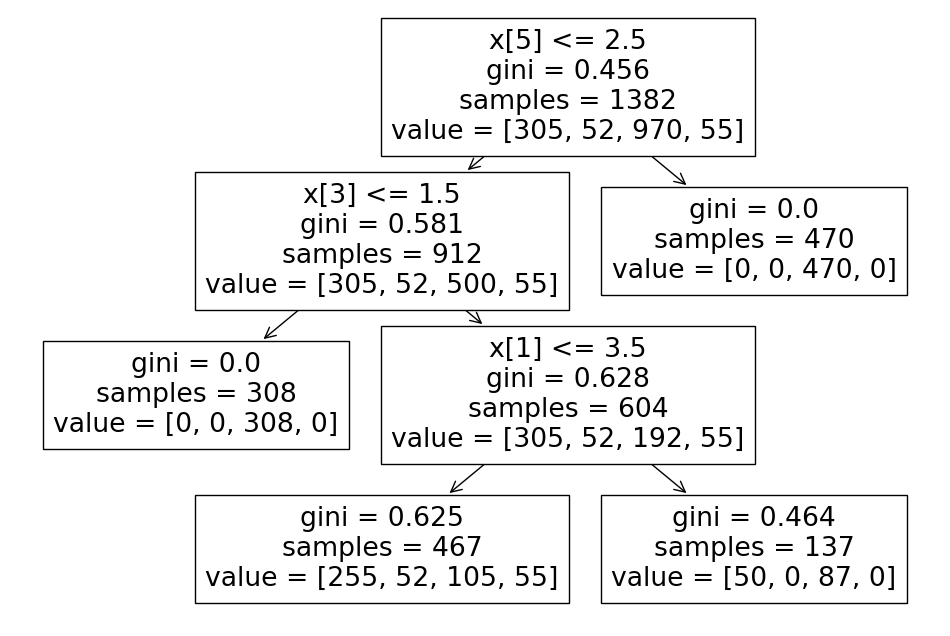

In [17]:
plt.figure(figsize=(12,8))
tree.plot_tree(giniclf.fit(X_train,y_train))

In [18]:
newtree=tree.export_graphviz(giniclf,out_file=None,feature_names=X_train.columns,class_names=y_train,filled=True,rounded=True,special_characters=True)

In [19]:
graph=graphviz.Source(newtree)

In [20]:
enclf=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)

In [21]:
enclf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [22]:
ypreden=enclf.predict(X_test)
ypredten=enclf.predict(X_train)

In [23]:
print('Model accuracy for training data: {0:0.4f}'.format(accuracy_score(y_train,ypredten)))
print('Model accuracy for test data: {0:0.4f}'.format(accuracy_score(y_test,ypreden)))

Model accuracy for training data: 0.7836
Model accuracy for test data: 0.7543


In [24]:
print('Training set score: {:.4f}'.format(enclf.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(enclf.score(X_test,y_test)))

Training set score: 0.7836
Test set score: 0.7543


[Text(0.6, 0.875, 'x[5] <= 2.5\nentropy = 1.203\nsamples = 1382\nvalue = [305, 52, 970, 55]'),
 Text(0.4, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 912\nvalue = [305, 52, 500, 55]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 308\nvalue = [0, 0, 308, 0]'),
 Text(0.6, 0.375, 'x[0] <= 1.5\nentropy = 1.643\nsamples = 604\nvalue = [305, 52, 192, 55]'),
 Text(0.4, 0.125, 'entropy = 1.78\nsamples = 149\nvalue = [69, 35, 12, 33]'),
 Text(0.8, 0.125, 'entropy = 1.409\nsamples = 455\nvalue = [236, 17, 180, 22]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 470\nvalue = [0, 0, 470, 0]')]

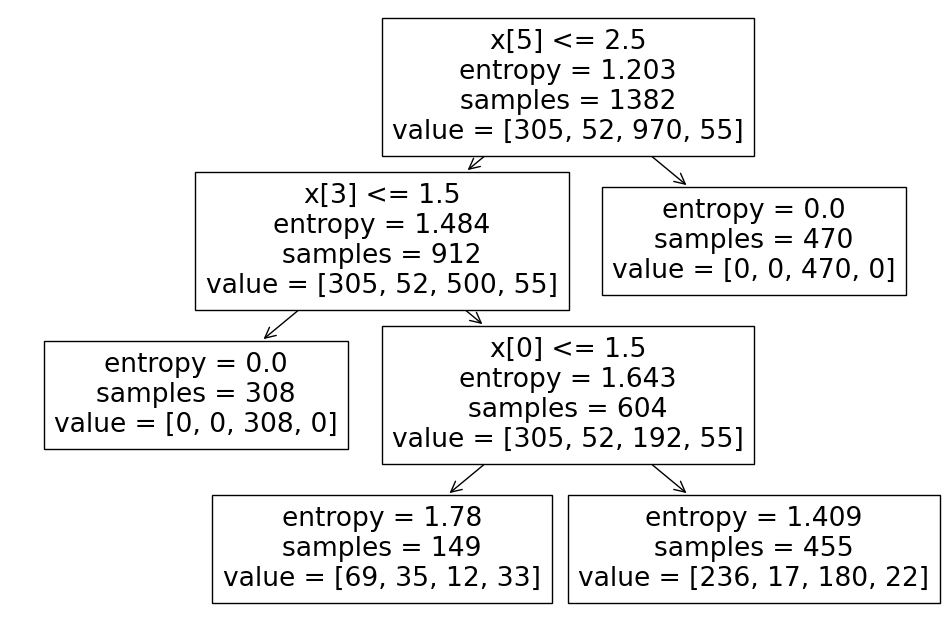

In [25]:
plt.figure(figsize=(12,8))
tree.plot_tree(enclf.fit(X_train,y_train))

In [26]:
newtreeen=tree.export_graphviz(enclf,out_file=None,feature_names=X_train.columns,class_names=y_train,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(newtreeen)


In [27]:
cn=confusion_matrix(y_test,ypreden)
print('Confusion Matrix\n',cn)

Confusion Matrix
 [[ 79   0   0   0]
 [ 17   0   0   0]
 [ 58   0 182   0]
 [ 10   0   0   0]]
